#<center>Bitcoin vs Ethereum</center>
<h3><center>Miguel Moreno</center></h3>
<p align="justify">
<center>
<b>Abstract:</b> In this notebook we study the correlation between the values of Bitcoin and Ethereum during the year 2020, by market capitalization. We found that the values of 2020 resembles a linear relation. We model this relation by a linear regression and test this model with the value of this two cryptoassets of January 2021.
</center>
</p>


##Introduction
<p align="justify">
During the last years we have seen a raise on the popularity of Bitcoin and, as a consequence, a raise on the value of Bitcoin, in July 2020 Bitcoin reached a value over the 10000 USD. Due to its quick grow many people see Bitcoin as a booble and as an unstable assets.
</p>
<p align="justify">
Many articles and news have been written about the high value of Bitcoin, but few were written about some other cryptoassets. Bitcoin is not the only cryptoassets with a high popularity and gorwing rate. Ethereum is the second most popular cryptocurrency which has also gained a lot of popularity in the recent years, this has been unnoticed  by most of the people and mainstream news. It is natural to ask whether there is a relation between the values of the different cryptocurrencies, in this notebook we study this question for Bitcoin and Ethereum during the 2020.
</p>

<p align="justify">
Cryptocurrencies are not the only cryptoassets, the introduction of Blockchain 2.0 allowed the introduction of different kinds of Token which uses blockchains that already exist, such as the Basic Attention Token from the browser Brave which usses the Ethereum blockchain. It is easy to jump to the conclusion that a rise in the popularity of Ethereum would imply a rise on the popularity of tokens based on the Ethereum blockchain. In this paper we study the question whether an increase on the popularity of Ethereum implies an increase on the popularity of the Basic Attention Token.
</p>
<p align="justify">
This notebook and the code used in it can be found in the github of the author. The pdf version of this notebook can be found in the webpage of the author.
</p>

##Preliminaries
This is a notebook running in Googlecolab in which we will be using R for coding and we will use the data from Yahoo finance. Therefore we have to activate the magic for R and obtain tha data from Yahoo. In this section we will activate R and install/activate the packages that we will use.

Activation of R magic

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Intall and load the packages

In [ ]:
%%R
install.packages('quantmod')
install.packages('dplyr')
install.packages('tidyverse')
install.packages('ggplot2')
install.packages('caTools')
library(quantmod)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(caTools)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

##Preparation and exploration of the data
<p align="justify">
In this section we proceed to obtain the data and do a basic exploration of it, to get a basic overview of the values. We will use the data of Bitcoin, Ethereum, and the Basic Attention Token. For each one we will download the data an plot the Japanese Candllesticks. We will work with the adjusted value.
</p>

<p align="justify">
We will study the time interval os 2020, from 1st of January to the 31st of December. We have to define the interval so we can proced with the downloading of the data.
</p>

In [ ]:
%%R
starting_date <- "2020-1-1"
final_date <- "2020-12-31"

###Bitcoin

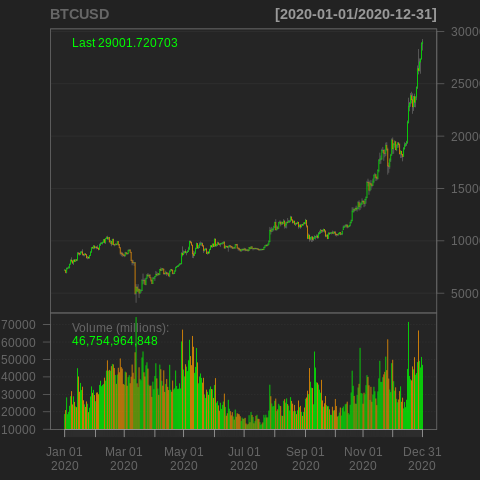

In [ ]:
%%R
BTCUSD <- getSymbols.yahoo("BTC-USD", from = starting_date, to = final_date, auto.assign = F)[,]
BTCAdjust <- BTCUSD[,6]
chartSeries(BTCUSD)

###Ethereum

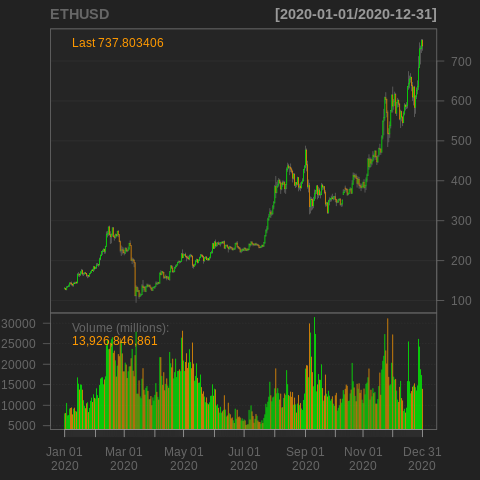

In [ ]:
%%R
ETHUSD <- getSymbols.yahoo("ETH-USD", from = starting_date, to = final_date, auto.assign = F)[,]
ETHAdjust <- ETHUSD[,6]
chartSeries(ETHUSD)

###Basic Attention Token

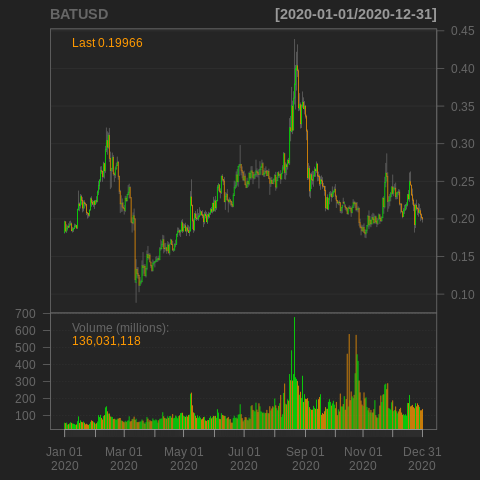

In [ ]:
%%R
BATUSD <- getSymbols.yahoo("BAT-USD", from = starting_date, to = final_date, auto.assign = F)[,]
BATAdjust <- BATUSD[,6]
chartSeries(BATUSD)

###Exploration of Bitcoin vs Ethereum
<p align="justify">
As we could see in the previous images, Bitcoin and Ethereum have similarities in the behaviour of their value. The most notorious are the months of February, October, and September. To explore this similarities we should look at different indeces.
</p>

Let us start by taking a close look to the adjustment, below we find the plot of the adjustment, on top is the Bitcoin and Ethereum is below.

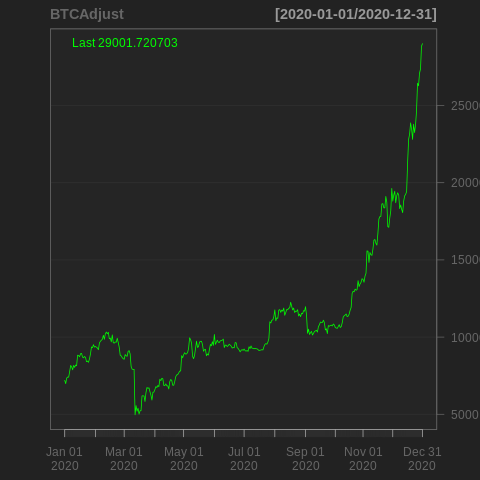

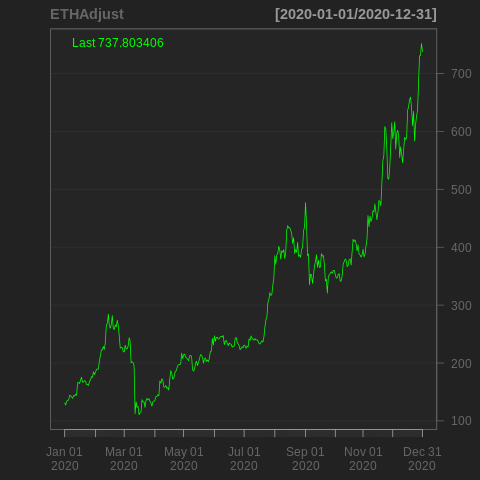

In [ ]:
%%R
chartSeries(BTCAdjust)
chartSeries(ETHAdjust)

Now lets take a look to the Moving Convergence Divergence (MACD), on top we can find the plot of BItcoin and below is the Ethereum one.

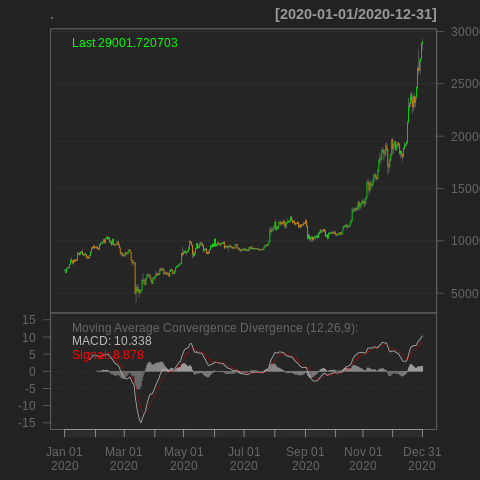

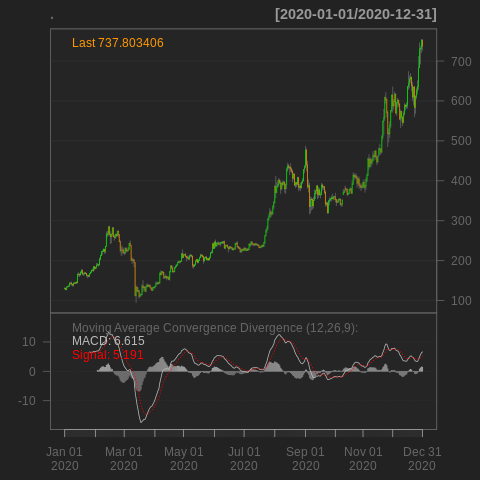

In [ ]:
%%R
`BTCUSD` %>% chartSeries(TA = "addMACD()")
`ETHUSD` %>% chartSeries(TA = "addMACD()")

Now lets take a look to the Relative Strength Index (RSI), on top we can find the plot of BItcoin and below is the Ethereum one.

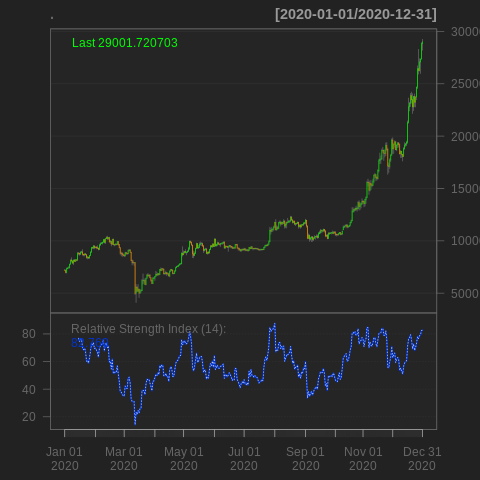

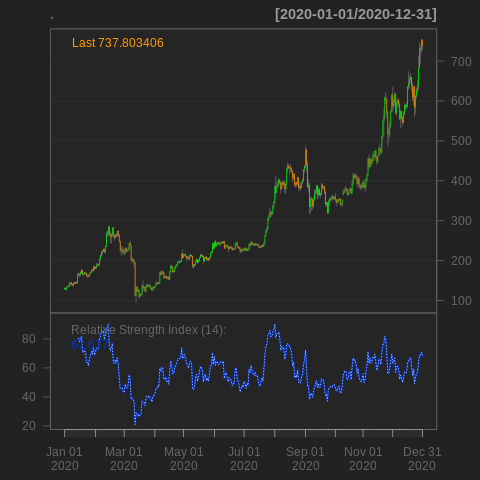

In [ ]:
%%R
`BTCUSD` %>% chartSeries(TA = "addRSI()")
`ETHUSD` %>% chartSeries(TA = "addRSI()")


Now lets take a look to the Average True Range (ATR), on top we can find the plot of BItcoin and below is the Ethereum one.

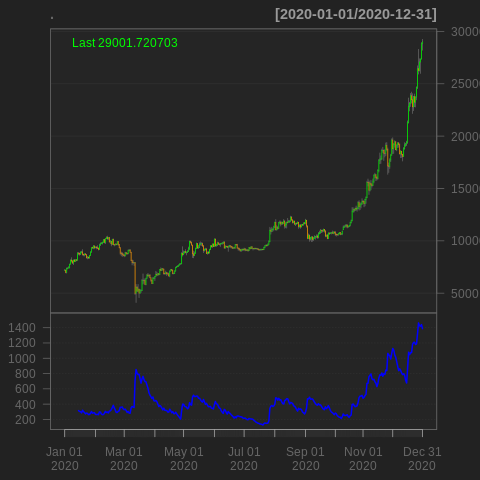

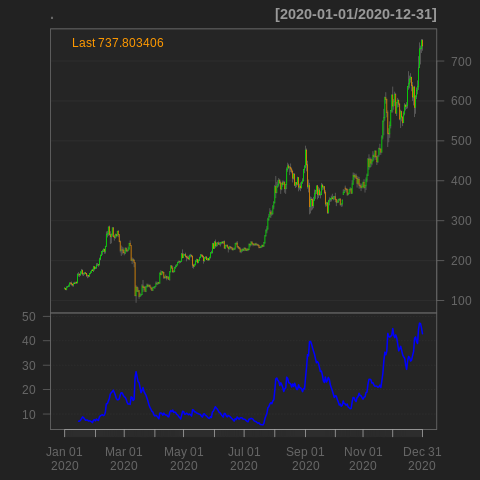

In [ ]:
%%R
`BTCUSD` %>% chartSeries(TA = "addATR()")
`ETHUSD` %>% chartSeries(TA = "addATR()")

To get a better overview of the possible correlation between the value of these two assets, we shoul plot the variation of adjustment of both in the same graphic with respect of the date.

In [ ]:
%%R
tickersEB <- c("ETH-USD", "BTC-USD")
portfolioPricesEB <- NULL
for (ticker in tickersEB){
  portfolioPricesEB <- cbind(portfolioPricesEB, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}

In [ ]:
%%R
portfolioPricesEB <- as.data.frame(portfolioPricesEB)
portfolioPricesEB <- rownames_to_column(portfolioPricesEB, var = "Date")
dfEB_for_plot <- portfolioPricesEB %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEB_for_plot <- na.omit(dfEB_for_plot)

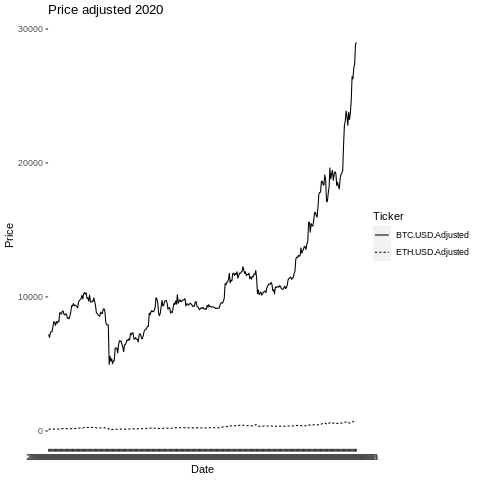

In [ ]:
%%R
ggplot(dfEB_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price adjusted 2020")

<p align="justify">
In priciple, from the previous graphic we could conclude that our initial conjecture was mistaken. In the previous graphic we can see huge variations on the value of Bitcoin and very small variations on the value of Ethereum. But the previous graphic was done with the data with no processing, therefore the high value of the Bitcoin could be the reason why we see very small changes on the value of Ethereum in the graphic and no correlation between the two corruencies.
</p>
<p align="justify">
To take away the noise made by the high value of Bitcoin, we must normalize the value of both currencies before we plot both values in the same graphic.
</p>

In [ ]:
%%R
ETHNorm <- na.omit(portfolioPricesEB)[2]/max(na.omit(portfolioPricesEB)[2])
BTCNorm <- na.omit(portfolioPricesEB)[3]/max(na.omit(portfolioPricesEB)[3])
NormEB = data.frame(ETHNorm,BTCNorm)

In [ ]:
%%R
NormEB <- rownames_to_column(NormEB, var = "Date")
dfEx_for_plot <- NormEB %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEx_for_plot <- na.omit(dfEx_for_plot)

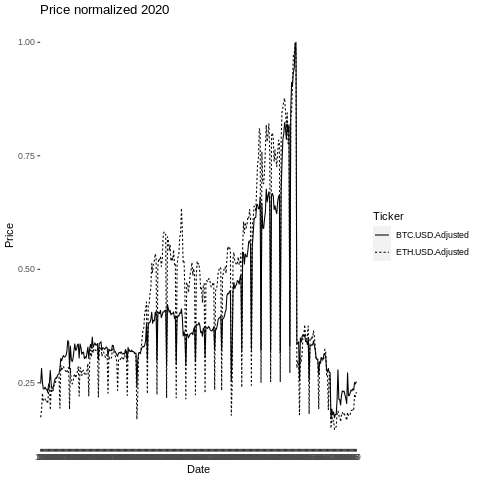

In [ ]:
%%R
ggplot(dfEx_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price normalized 2020")

<p align="justify">
After normalizing both values, we see that both graphics overlap in most of the changes when the value drops (or increase) "drastically", as we can see from the graphic above. 
</p>
<p align="justify">
Finally we plot the value of Ethereum as a dependence variable of the value of Bitcoin. With this, we try to understand the value of Ethereum as a direct result of the value of Bitcoin.
This graphic will give us a better idea of their correlation, it worth to mention that the date is not taken into account for this plot. Therefore, we don't see the evolution of the values but the possible relation between them.
</p>

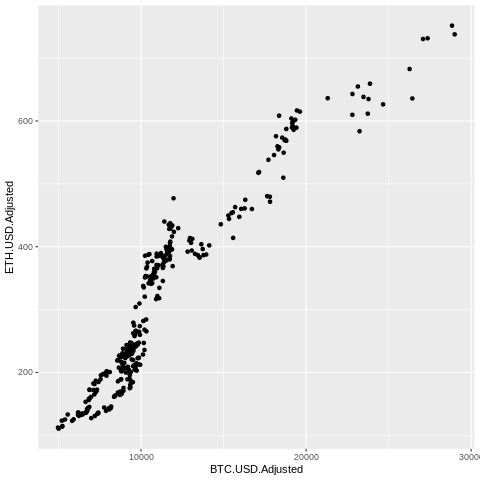

In [ ]:
%%R
dataEB <- na.omit(portfolioPricesEB)
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point()

As we can see in the previous graphic, the relation we have been observing resembles a line.

R[write to console]: `geom_smooth()` using formula 'y ~ x'



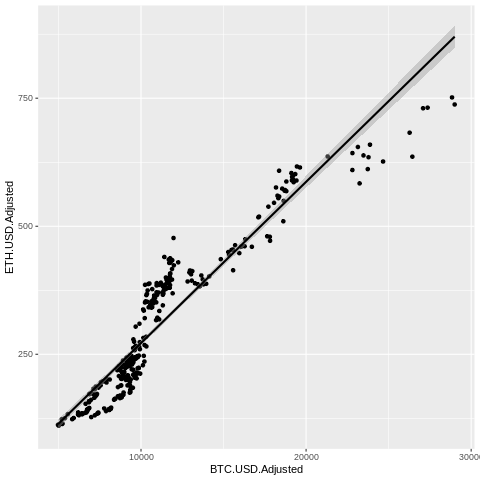

In [ ]:
%%R
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point() +  geom_smooth(method = "lm", se = TRUE, color = 'black')

###Ethereum vs Basic Attention Token
<p align="justify">
As we could see in the previous images, Ethereum and the Basic Attention Token have no similarities in the behaviour of their value. To explore this similarities we should look at different indeces.
</p>

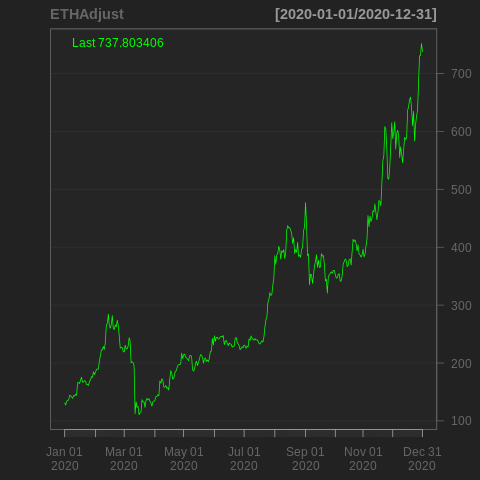

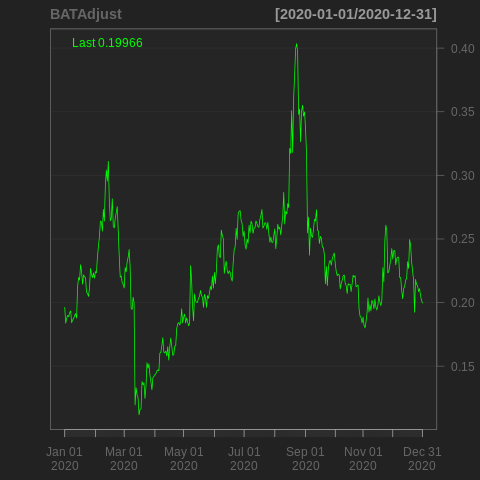

In [ ]:
%%R
chartSeries(ETHAdjust)
chartSeries(BATAdjust)

Now lets take a look to the Moving Convergence Divergence (MACD), on top we can find the plot of Ethereum and below is the Basic Attention Token one.

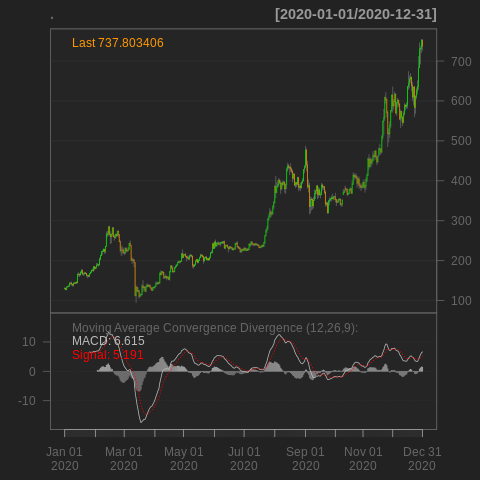

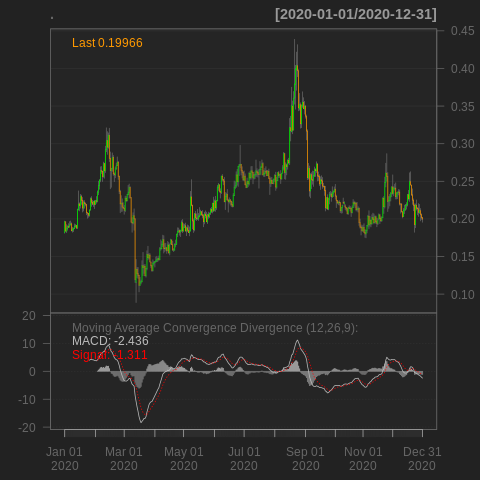

In [ ]:
%%R
`ETHUSD` %>% chartSeries(TA = "addMACD()")
`BATUSD` %>% chartSeries(TA = "addMACD()")

Now lets take a look to the Relative Strength Index (RSI), on top we can find the plot of Ethereum and below is the Basic Attention Token one.

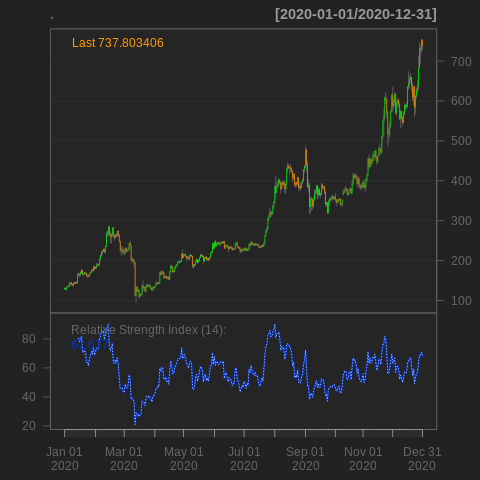

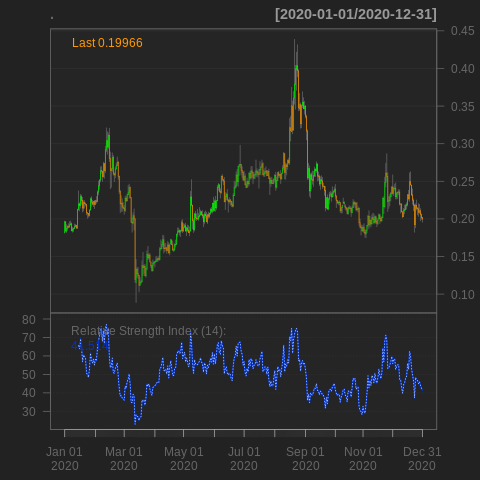

In [ ]:
%%R
`ETHUSD` %>% chartSeries(TA = "addRSI()")
`BATUSD` %>% chartSeries(TA = "addRSI()")

Now lets take a look to the Average True Range (ATR), on top we can find the plot of Ethereum and below is the Basic Attention Token one.

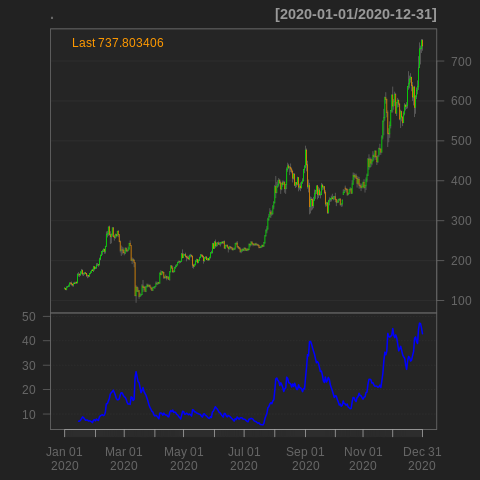

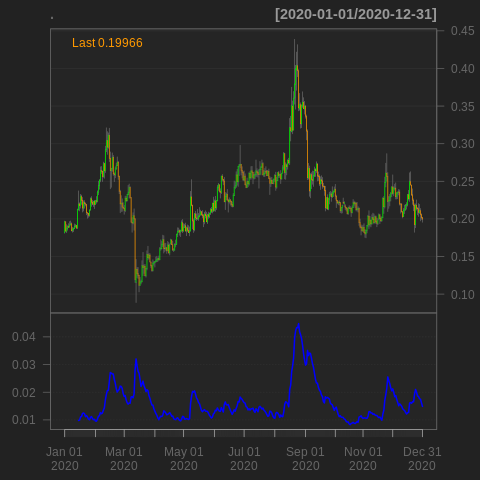

In [ ]:
%%R
`ETHUSD` %>% chartSeries(TA = "addATR()")
`BATUSD` %>% chartSeries(TA = "addATR()")

We shoul plot the variation of adjustment of both assets in the same graphic with respect of the date, in order to corroborate that there is no correlation.

In [ ]:
%%R
tickersEBAT <- c("BAT-USD", "ETH-USD")
portfolioPricesEBAT <- NULL
for (ticker in tickersEBAT){
  portfolioPricesEBAT <- cbind(portfolioPricesEBAT, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
}

In [ ]:
%%R
portfolioPricesEBAT <- as.data.frame(portfolioPricesEBAT)
portfolioPricesEBAT <- rownames_to_column(portfolioPricesEBAT, var = "Date")
dfEBAT_for_plot <- portfolioPricesEBAT %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEBAT_for_plot <- na.omit(dfEBAT_for_plot)

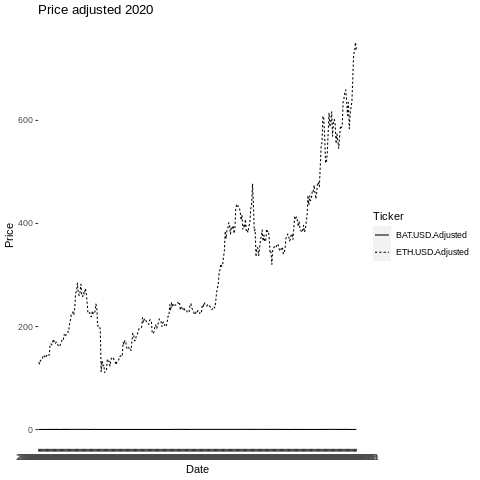

In [ ]:
%%R
ggplot(dfEBAT_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price adjusted 2020")

<p align="justify">
In priciple, from the previous graphic we could conclude that our initial conjecture is true. In the previous graphic we can see huge variations on the value of Ethereum and no variations on the value of the Basic Attention Token. But the previous graphic was done with the data with no processing, therefore the high value of the Ethereum could be the reason why we see no changes on the value of the Basic Attention Token in the graphic and no correlation between the two corruencies.
</p>
<p align="justify">
To take away the noise made by the high value of Ethereum, we must normalize the value of both currencies before we plot both values in the same graphic.
</p>

In [ ]:
%%R
BATNorm <- na.omit(portfolioPricesEBAT)[2]/max(na.omit(portfolioPricesEBAT)[2])
ETHNorm <- na.omit(portfolioPricesEBAT)[3]/max(na.omit(portfolioPricesEBAT)[3])
NormEBAT = data.frame(BATNorm,ETHNorm)

In [ ]:
%%R
NormEBAT <- rownames_to_column(NormEBAT, var = "Date")
dfEn_for_plot <- NormEBAT %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEn_for_plot <- na.omit(dfEn_for_plot)

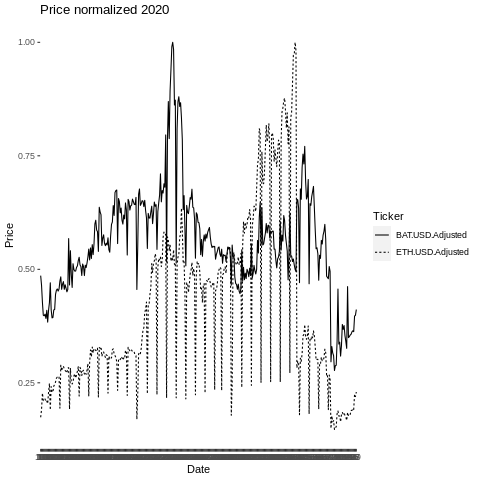

In [ ]:
%%R
ggplot(dfEn_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price normalized 2020")

<p align="justify">
After normalizing both values, we see that both graphics overlap very rarely. 
</p>
<p align="justify">
Finally we plot the value of the Basic Attention Token as a dependence variable of the value of Ethereum. With this, we will see that our conjecture was correct.
This graphic will give us a better idea of their correlation, it worth to mention that the date is not taken into account for this plot. Therefore, we don't see the evolution of the values but the possible relation between them.
</p>

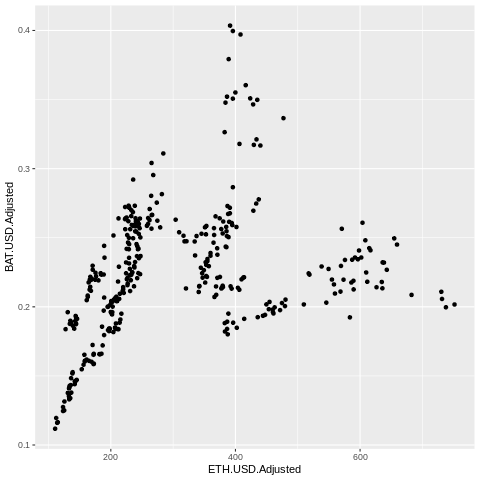

In [ ]:
%%R
dataEBAT <- na.omit(portfolioPricesEBAT)
ggplot(dataEBAT, aes(x = ETH.USD.Adjusted, y = BAT.USD.Adjusted)) + geom_point()

##Study of correlation between Bitcoin vs Ethereum

###Calculate correlation

In [ ]:
%%R
cor.test(dataEB[,3], dataEB[,2])


	Pearson's product-moment correlation

data:  dataEB[, 3] and dataEB[, 2]
t = 52.925, df = 360, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9283361 0.9520370
sample estimates:
      cor 
0.9413364 



###Prepare the data to build the model

In [ ]:
%%R
split = sample.split(dataEB$ETH.USD.Adjusted, SplitRatio = 0.8)
training_set = subset(dataEB, split == TRUE)
test_set = subset(dataEB, split == FALSE)

###Build and test the model

In [ ]:
%%R
regressor = lm(formula = ETH.USD.Adjusted ~ BTC.USD.Adjusted, 
               data = training_set)

In [ ]:
%%R
y_pred = predict(regressor, newdata = test_set)

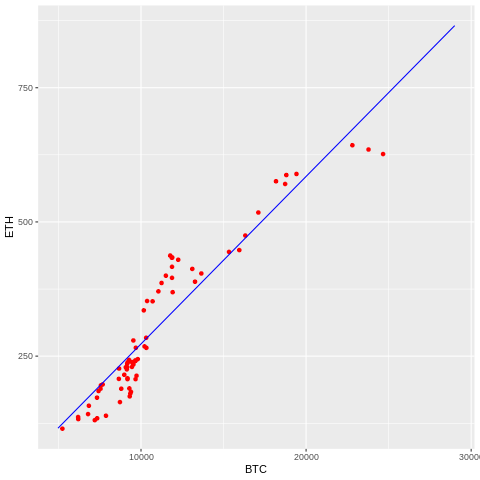

In [ ]:
%%R
ggplot() +
  geom_point(aes(x = test_set$BTC.USD.Adjusted, y = test_set$ETH.USD.Adjusted), 
             colour = 'red') +
  geom_line(aes(x = training_set$BTC.USD.Adjusted, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  xlab('BTC') +
  ylab('ETH')

R[write to console]: `geom_smooth()` using formula 'y ~ x'



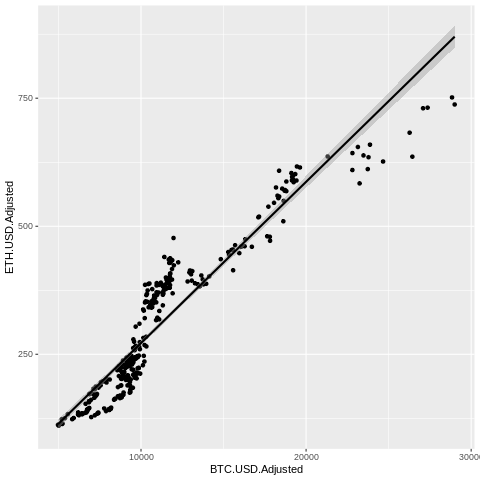

In [ ]:
%%R
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point() +  geom_smooth(method = "lm", se = TRUE, color = 'black')

###Predicting new data (January 2021)
Obtaining the data of January 2021

In [ ]:
%%R
starting_prediction_date <- "2021-1-1"
final_prediction_date <- "2021-1-31"

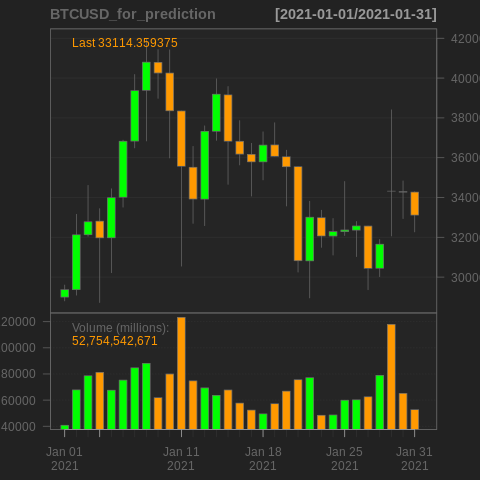

In [ ]:
%%R
BTCUSD_for_prediction <- getSymbols.yahoo("BTC-USD", from = starting_prediction_date, to = final_prediction_date, auto.assign = F)[,]
BTCAdjust_for_prediction <- BTCUSD_for_prediction[,6]
chartSeries(BTCUSD_for_prediction)

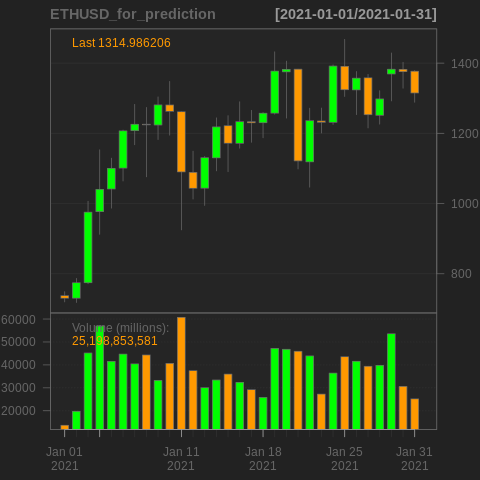

In [ ]:
%%R
ETHUSD_for_prediction <- getSymbols.yahoo("ETH-USD", from = starting_prediction_date, to = final_prediction_date, auto.assign = F)[,]
ETHAdjust_for_prediction <- ETHUSD_for_prediction[,6]
chartSeries(ETHUSD_for_prediction)

In [ ]:
%%R
EB_for_prediction <- NULL
for (ticker in tickersEB){
  EB_for_prediction <- cbind(EB_for_prediction, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_prediction_date, 
                                                      to = final_prediction_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}

Testing the trend

In [ ]:
%%R
ETH_pred = data.frame(EB_for_prediction$BTC.USD.Adjusted, predict(regressor, newdata = EB_for_prediction))
names(ETH_pred)[2] <- "ETH.USD.Adjusted"
ETH_pred<- ETH_pred[, c(2,1)]

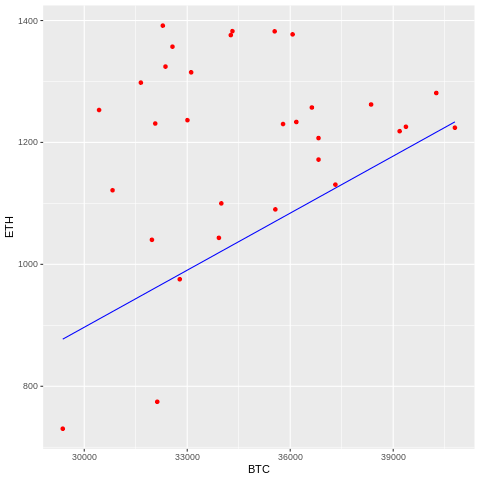

In [ ]:
%%R
ggplot() +
       geom_line(aes(x = ETH_pred$BTC.USD.Adjusted, y = ETH_pred$ETH.USD.Adjusted) , colour = 'blue') +
       geom_point(aes(x = EB_for_prediction$BTC.USD.Adjusted, y = EB_for_prediction$ETH.USD.Adjusted) , colour = 'red') +
       xlab('BTC') +
       ylab('ETH')

##Conclusions

###The big picture

In [ ]:
%%R
EB_whole <- NULL
for (ticker in tickersEB){
  EB_whole <- cbind(EB_whole, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_prediction_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}

In [ ]:
%%R
ETH_pred_whole = data.frame(EB_whole$BTC.USD.Adjusted, predict(regressor, newdata = EB_whole))
names(ETH_pred_whole)[2] <- "ETH.USD.Adjusted"
ETH_pred_whole<- ETH_pred_whole[, c(2,1)]

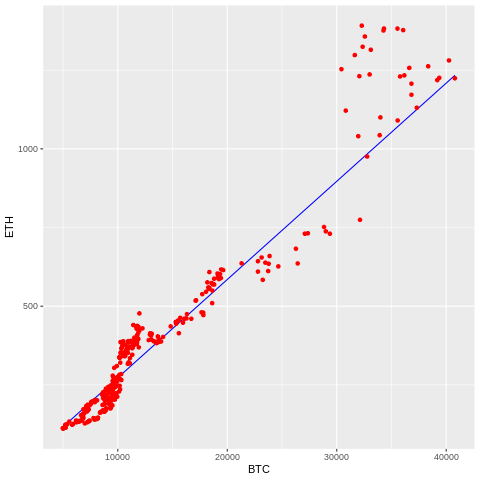

In [ ]:
%%R
ggplot() +
       geom_line(aes(x = ETH_pred_whole$BTC.USD.Adjusted, y = ETH_pred_whole$ETH.USD.Adjusted) , colour = 'blue') +
       geom_point(aes(x = EB_whole$BTC.USD.Adjusted, y = EB_whole$ETH.USD.Adjusted) , colour = 'red') +
       xlab('BTC') +
       ylab('ETH')

###Future trend